In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

In [6]:
iris = load_iris()
X = iris.data[:, (2, 3)] # petal length and width
y = (iris.target == 0).astype(np.int) # Iris setosa ?

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

In [7]:
y_pred

array([1])

In [8]:
import tensorflow as tf
from tensorflow import keras

In [9]:
tf.__version__

'2.4.1'

In [10]:
keras.__version__

'2.4.0'

In [11]:
fashion_mnist = keras.datasets.fashion_mnist

In [12]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [13]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_train_full.dtype

dtype('uint8')

In [16]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [17]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [18]:
class_names[y_train[0]]

'Coat'

In [19]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.layers

In [22]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [23]:
model.get_layer(hidden1.name) is hidden1

True

In [24]:
weights, biases = hidden1.get_weights()

In [25]:
weights

array([[ 0.038603  , -0.06862283, -0.02021981, ..., -0.00496241,
         0.0471869 ,  0.00747262],
       [ 0.03541609,  0.05139717,  0.0527024 , ...,  0.06281766,
         0.01354369, -0.04437777],
       [-0.00683432,  0.05364791,  0.05007171, ...,  0.00253814,
         0.02830452,  0.01227477],
       ...,
       [ 0.06826375, -0.05682009, -0.05628312, ...,  0.04679225,
        -0.04729334,  0.00932236],
       [ 0.04878592, -0.01593674, -0.01767081, ...,  0.07023495,
        -0.04674324, -0.01461582],
       [ 0.02358428, -0.01489579, -0.04791579, ..., -0.03064432,
         0.06459033,  0.04289089]], dtype=float32)

In [26]:
weights.shape

(784, 300)

In [27]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [28]:
biases.shape

(300,)

In [29]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [31]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 1.0163 - accuracy: 0.6793 - val_loss: 0.5056 - val_accuracy: 0.8312
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4937 - accuracy: 0.8302 - val_loss: 0.4365 - val_accuracy: 0.8520
Epoch 3/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4451 - accuracy: 0.8445 - val_loss: 0.4159 - val_accuracy: 0.8520
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4128 - accuracy: 0.8558 - val_loss: 0.4241 - val_accuracy: 0.8484
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4001 - accuracy: 0.8589 - val_loss: 0.3816 - val_accuracy: 0.8698
Epoch 6/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3840 - accuracy: 0.8647 - val_loss: 0.3718 - val_accuracy: 0.8724
Epoch 7/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3665 - accuracy: 0.8714 - val_loss: 0.3681 - val_accuracy:

In [32]:
import pandas as pd

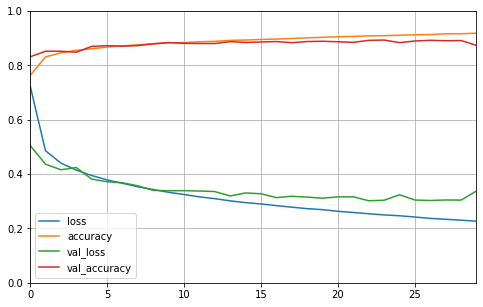

In [33]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [35]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 51.3127 - accuracy: 0.8637


[51.31266403198242, 0.8636999726295471]

In [39]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [40]:
y_pred = np.argmax(model.predict(X_new), axis=1)
y_pred

array([9, 2, 1], dtype=int64)

In [41]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [42]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [57]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [58]:
housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [59]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [60]:
np.random.seed(42)
tf.random.set_seed(42)

In [61]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])

model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 0s 935us/step - loss: 2.2656 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 726us/step - loss: 0.7413 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 701us/step - loss: 0.6604 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 700us/step - loss: 0.6245 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 772us/step - loss: 0.5770 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 697us/step - loss: 0.5609 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 744us/step - loss: 0.5500 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 726us/step - loss: 0.5200 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 831us/step - loss: 0.5051 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 787us/step - loss: 0.491

In [62]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 530us/step - loss: 0.4212


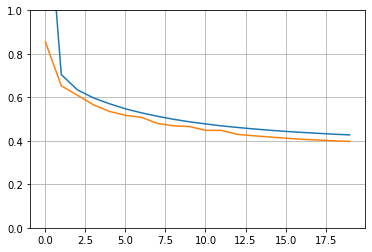

In [63]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [64]:
y_pred

array([[0.3885664],
       [1.6792021],
       [3.1022797]], dtype=float32)

In [67]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.Model(inputs=[input_], outputs=[output])

In [68]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 8)]          0                                            
__________________________________________________________________________________________________
dense_10 (Dense)                (None, 30)           270         input_3[0][0]                    
__________________________________________________________________________________________________
dense_11 (Dense)                (None, 30)           930         dense_10[0][0]                   
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 38)           0           input_3[0][0]                    
                                                                 dense_11[0][0]               

In [69]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.1131 - val_loss: 2.7131
Epoch 2/20
363/363 [==============================] - 0s 836us/step - loss: 0.7982 - val_loss: 0.6461
Epoch 3/20
363/363 [==============================] - 0s 842us/step - loss: 0.6542 - val_loss: 0.6101
Epoch 4/20
363/363 [==============================] - 0s 829us/step - loss: 0.6220 - val_loss: 0.5695
Epoch 5/20
363/363 [==============================] - 0s 831us/step - loss: 0.5689 - val_loss: 0.5415
Epoch 6/20
363/363 [==============================] - 0s 770us/step - loss: 0.5455 - val_loss: 0.5239
Epoch 7/20
363/363 [==============================] - 0s 849us/step - loss: 0.5395 - val_loss: 0.5123
Epoch 8/20
363/363 [==============================] - 0s 772us/step - loss: 0.5139 - val_loss: 0.4832
Epoch 9/20
363/363 [==============================] - 0s 821us/step - loss: 0.4963 - val_loss: 0.4673
Epoch 10/20
363/363 [==============================] - 0s 791us/step - loss: 0.4853 

In [70]:
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

162/162 [==============================] - 0s 460us/step - loss: 0.4023


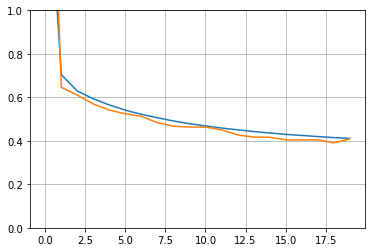

In [71]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [72]:
y_pred

array([[0.49783468],
       [1.7598438 ],
       [3.4431183 ]], dtype=float32)

In [73]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.Model(inputs=[input_A, input_B], outputs=[output])

In [74]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
deep_input (InputLayer)         [(None, 6)]          0                                            
__________________________________________________________________________________________________
dense_13 (Dense)                (None, 30)           210         deep_input[0][0]                 
__________________________________________________________________________________________________
wide_input (InputLayer)         [(None, 5)]          0                                            
__________________________________________________________________________________________________
dense_14 (Dense)                (None, 30)           930         dense_13[0][0]                   
____________________________________________________________________________________________

In [75]:
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_new[:, :5], X_new[:, 2:]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20, validation_data=((X_valid_A, X_valid_B), y_valid))

mse_test = model.evaluate((X_test_A, X_test_B), y_test)
X_new = X_test[:3]
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 3.5735 - val_loss: 1.2747
Epoch 2/20
363/363 [==============================] - 0s 873us/step - loss: 0.8716 - val_loss: 0.6923
Epoch 3/20
363/363 [==============================] - 0s 894us/step - loss: 0.6648 - val_loss: 0.5778
Epoch 4/20
363/363 [==============================] - 0s 872us/step - loss: 0.5935 - val_loss: 0.5309
Epoch 5/20
363/363 [==============================] - 0s 873us/step - loss: 0.5399 - val_loss: 0.4960
Epoch 6/20
363/363 [==============================] - 0s 831us/step - loss: 0.5005 - val_loss: 0.4766
Epoch 7/20
363/363 [==============================] - 0s 874us/step - loss: 0.4969 - val_loss: 0.4662
Epoch 8/20
363/363 [==============================] - 0s 848us/step - loss: 0.4775 - val_loss: 0.4432
Epoch 9/20
363/363 [==============================] - 0s 830us/step - loss: 0.4577 - val_loss: 0.4586
Epoch 10/20
363/363 [==============================] - 0s 874us/step - loss: 0.4502 

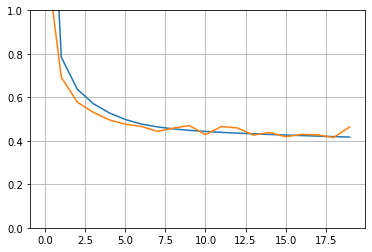

In [76]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [77]:
y_pred

array([[0.40994203],
       [1.8999227 ],
       [3.312199  ]], dtype=float32)

In [79]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.Concatenate()([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1, name="aux_output")(hidden2) # auxliary output
model = keras.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [80]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer='sgd')

In [82]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.4917 - main_output_loss: 1.3280 - aux_output_loss: 2.9643 - val_loss: 0.9666 - val_main_output_loss: 0.9289 - val_aux_output_loss: 1.3053
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5817 - main_output_loss: 0.5098 - aux_output_loss: 1.2293 - val_loss: 4.6824 - val_main_output_loss: 5.0737 - val_aux_output_loss: 1.1609
Epoch 3/20
363/363 [==============================] - 0s 959us/step - loss: 0.5941 - main_output_loss: 0.5454 - aux_output_loss: 1.0328 - val_loss: 1.2940 - val_main_output_loss: 1.3306 - val_aux_output_loss: 0.9651
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4923 - main_output_loss: 0.4451 - aux_output_loss: 0.9168 - val_loss: 1.3763 - val_main_output_loss: 1.4234 - val_aux_output_loss: 0.9518
Epoch 5/20
363/363 [==============================] - 0s 993us/step - loss: 0.4683 - main_output_loss: 0.4299 - aux_output_loss: 0.8137 - val_

In [83]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 717us/step - loss: 0.3657 - main_output_loss: 0.3528 - aux_output_loss: 0.4818


In [84]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

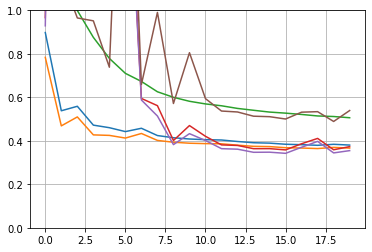

In [91]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [92]:
history.history

{'loss': [0.8979712724685669,
  0.5382444858551025,
  0.5588394999504089,
  0.47215068340301514,
  0.4603824317455292,
  0.4424251914024353,
  0.45773133635520935,
  0.4242612421512604,
  0.4141920208930969,
  0.40828830003738403,
  0.4053906798362732,
  0.40374955534935,
  0.3969149589538574,
  0.3912193477153778,
  0.38936349749565125,
  0.3842184543609619,
  0.3822838068008423,
  0.37940743565559387,
  0.38402459025382996,
  0.38047313690185547],
 'main_output_loss': [0.7838947176933289,
  0.4687677025794983,
  0.5098966956138611,
  0.4272972047328949,
  0.42497724294662476,
  0.41266369819641113,
  0.4338027238845825,
  0.4018939137458801,
  0.3935278654098511,
  0.38900476694107056,
  0.3871365487575531,
  0.3862566351890564,
  0.38001590967178345,
  0.37463587522506714,
  0.37348997592926025,
  0.3683193325996399,
  0.3668381869792938,
  0.3644119203090668,
  0.3698285222053528,
  0.36650213599205017],
 'aux_output_loss': [1.9246647357940674,
  1.1635351181030273,
  0.99932742118

In [98]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")

In [99]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(lr=1e-3))
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=10,
                    validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/10
363/363 [==============================] - 1s 2ms/step - loss: 3.4560 - output_1_loss: 3.2349 - output_2_loss: 5.4463 - val_loss: 2.3842 - val_output_1_loss: 1.6300 - val_output_2_loss: 9.1725
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.1126 - output_1_loss: 0.8415 - output_2_loss: 3.5521 - val_loss: 1.7019 - val_output_1_loss: 0.6294 - val_output_2_loss: 11.3546
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.7837 - output_1_loss: 0.6169 - output_2_loss: 2.2852 - val_loss: 1.6821 - val_output_1_loss: 0.5408 - val_output_2_loss: 11.9535
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6663 - output_1_loss: 0.5538 - output_2_loss: 1.6788 - val_loss: 1.5594 - val_output_1_loss: 0.4986 - val_output_2_loss: 11.1065
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6060 - output_1_loss: 0.5139 - output_2_loss: 1.4343 - val_loss: 1.3880 - val_output_1_loss: 0.4700 - val

In [100]:
total_loss, main_loss, aux_loss = model.evaluate([X_test_A, X_test_B], [y_test, y_test])

162/162 [==============================] - 0s 760us/step - loss: 0.4965 - output_1_loss: 0.4355 - output_2_loss: 1.0457


In [101]:
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

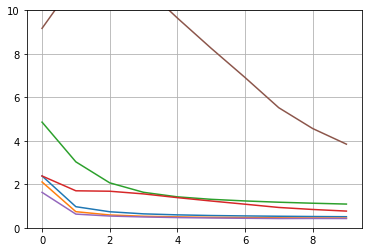

In [103]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 10)
plt.show()

In [104]:
np.random.seed(42)
tf.random.set_seed(42)

In [105]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 988us/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 994us/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 625us/step - loss: 0.4382


In [106]:
model.save("my_keras_model.h5")

In [107]:
model = keras.models.load_model("my_keras_model.h5")

In [108]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [109]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

In [110]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)

history = model.fit(X_train, y_train, epochs=10,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])

model = keras.models.load_model("my_keras_model.h5") # rollback to best model

mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/10
363/363 [==============================] - 1s 2ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/10
363/363 [==============================] - 1s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/10
162/162 [==============================] - 0s 566us/step - loss: 0.4382


In [111]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)

history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])

mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4578 - val_loss: 0.4110
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4430 - val_loss: 0.4266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4376 - val_loss: 0.3996
Epoch 4/100
363/363 [==============================] - 1s 1ms/step - loss: 0.4361 - val_loss: 0.3939
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4204 - val_loss: 0.3889
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4112 - val_loss: 0.3866
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4226 - val_loss: 0.3860
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4135 - val_loss: 0.3793
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4039 - val_loss: 0.3746
Epoch 10/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4023 - val_lo

363/363 [==============================] - 0s 1ms/step - loss: 0.3297 - val_loss: 0.3274
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3441 - val_loss: 0.3167
Epoch 83/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3369 - val_loss: 0.3280
Epoch 84/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3182 - val_loss: 0.3634
Epoch 85/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3235 - val_loss: 0.3176
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3184 - val_loss: 0.3156
Epoch 87/100
363/363 [==============================] - 1s 2ms/step - loss: 0.3395 - val_loss: 0.3529
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3264 - val_loss: 0.3258
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3210 - val_loss: 0.3630
Epoch 90/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3192 - val_loss: 

In [113]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [114]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[val_train_ratio_cb])

363/363 [==============================] - 1s 1ms/step - loss: 0.3302 - val_loss: 0.3556

val/train: 1.08


In [115]:
import os

root_logdir = os.path.join(os.curdir, "my_logs")

In [116]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()

In [117]:
run_logdir

'.\\my_logs\\run_2021_02_21-11_01_19'

In [118]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [119]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=1e-3))

In [120]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 3.3697 - val_loss: 0.7126
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6964 - val_loss: 0.6880
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 0.6167 - val_loss: 0.5803
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5846 - val_loss: 0.5166
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5321 - val_loss: 0.4895
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5083 - val_loss: 0.4951
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5044 - val_loss: 0.4861
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4813 - val_loss: 0.4554
Epoch 9/30
363/363 [==============================] - 1s 1ms/step - loss: 0.4627 - val_loss: 0.4413
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4549 - val_loss: 0.4379

In [123]:
%reload_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

Reusing TensorBoard on port 6006 (pid 10796), started 0:01:02 ago. (Use '!kill 10796' to kill it.)

In [125]:
run_logdir2 = get_run_logdir()

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])    
model.compile(loss="mse", optimizer=keras.optimizers.SGD(lr=0.05))

tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid),
                    callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7645 - val_loss: 302.8536
Epoch 2/30
363/363 [==============================] - 0s 1ms/step - loss: 8159520618.2209 - val_loss: 1.3230
Epoch 3/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3439 - val_loss: 1.3176
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3546 - val_loss: 1.3261
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3513 - val_loss: 1.3154
Epoch 6/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3274 - val_loss: 1.3203
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3639 - val_loss: 1.3149
Epoch 8/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3487 - val_loss: 1.3157
Epoch 9/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3445 - val_loss: 1.3150
Epoch 10/30
363/363 [==============================] - 0s 1ms/step - loss: 1.3697 - val_l

In [126]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [127]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(lr=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

In [128]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

In [129]:
keras_reg.fit(X_train, y_train, epochs=100,
             validation_data=(X_valid, y_valid),
             callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 2ms/step - loss: 1.5673 - val_loss: 20.7721
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 1.3216 - val_loss: 5.0266
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5972 - val_loss: 0.5490
Epoch 4/100
363/363 [==============================] - 0s 963us/step - loss: 0.4985 - val_loss: 0.4529
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4608 - val_loss: 0.4188
Epoch 6/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4410 - val_loss: 0.4129
Epoch 7/100
363/363 [==============================] - 0s 951us/step - loss: 0.4463 - val_loss: 0.4004
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4283 - val_loss: 0.3944
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4139 - val_loss: 0.3961
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4107 - v

363/363 [==============================] - 0s 1ms/step - loss: 0.3374 - val_loss: 0.3595
Epoch 81/100
363/363 [==============================] - 0s 987us/step - loss: 0.3381 - val_loss: 0.3432
Epoch 82/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3481 - val_loss: 0.3211
Epoch 83/100
363/363 [==============================] - 0s 956us/step - loss: 0.3441 - val_loss: 0.3342
Epoch 84/100
363/363 [==============================] - 0s 979us/step - loss: 0.3240 - val_loss: 0.4136
Epoch 85/100
363/363 [==============================] - 0s 964us/step - loss: 0.3303 - val_loss: 0.3285
Epoch 86/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3263 - val_loss: 0.3440
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3483 - val_loss: 0.3733
Epoch 88/100
363/363 [==============================] - 0s 961us/step - loss: 0.3305 - val_loss: 0.3188
Epoch 89/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3283 - 

In [130]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 638us/step - loss: 0.3409


In [131]:
y_pred = keras_reg.predict(X_new)

In [132]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

In [133]:
param_distribs = {
    "n_hidden":[0, 1, 2, 3],
    "n_neurons":np.arange(1, 100).tolist(),
    "learning_rate":reciprocal(3e-4, 3e-2).rvs(1000).tolist()
}

In [136]:
rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10,
                                  cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] n_neurons=4, n_hidden=1, learning_rate=0.022174573948353458 .....
Epoch 1/100


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


242/242 [==============================] - 1s 2ms/step - loss: 1.3647 - val_loss: 0.4686
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4824 - val_loss: 0.4998
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4609 - val_loss: 0.4157
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4598 - val_loss: 0.4080
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4392 - val_loss: 0.5519
Epoch 6/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4347 - val_loss: 0.4784
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4528 - val_loss: 0.5038
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4408 - val_loss: 0.6504
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4280 - val_loss: 0.4199
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4535 - val_loss: 0.5007
E

[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.4s remaining:    0.0s


242/242 [==============================] - 1s 1ms/step - loss: 1.6890 - val_loss: 0.4446
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4640 - val_loss: 0.4158
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.3959
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4310 - val_loss: 0.3926
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4357 - val_loss: 0.3928
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4258 - val_loss: 0.3911
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4144 - val_loss: 0.3937
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4256 - val_loss: 0.3834
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4127 - val_loss: 0.3840
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4169 - val_loss: 0.3852
E

242/242 [==============================] - 0s 1ms/step - loss: 0.3589 - val_loss: 0.3529
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3697 - val_loss: 0.3524
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3867 - val_loss: 0.3527
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3846 - val_loss: 0.3511
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3762 - val_loss: 0.3543
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3712 - val_loss: 0.3509
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3847 - val_loss: 0.3492
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3710 - val_loss: 0.3494
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3815 - val_loss: 0.3601
Epoch 50/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3730 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.3474 - val_loss: 0.3345
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3299 - val_loss: 0.3288
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3236 - val_loss: 0.3555
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3224 - val_loss: 0.3159
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3223 - val_loss: 0.3256
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3392 - val_loss: 0.3707
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3328 - val_loss: 0.3171
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3225 - val_loss: 0.3753
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3224 - val_loss: 0.3192
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3143 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.5141 - val_loss: 0.4946
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5057 - val_loss: 0.4914
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5202 - val_loss: 0.4862
Epoch 38/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4902 - val_loss: 0.4836
Epoch 39/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5135 - val_loss: 0.4799
Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4876 - val_loss: 0.4764
Epoch 41/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4999 - val_loss: 0.4739
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5085 - val_loss: 0.4705
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4980 - val_loss: 0.4675
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4865 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.6795 - val_loss: 3.9819
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6699 - val_loss: 3.3573
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7086 - val_loss: 2.8087
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6598 - val_loss: 2.3628
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6610 - val_loss: 1.9732
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6445 - val_loss: 1.6502
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6266 - val_loss: 1.3794
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6193 - val_loss: 1.1636
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5981 - val_loss: 0.9777
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6061 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4649 - val_loss: 0.4442
Epoch 54/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4670 - val_loss: 0.4417
Epoch 55/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4617 - val_loss: 0.4396
Epoch 56/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4644 - val_loss: 0.4376
Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4573 - val_loss: 0.4359
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4707 - val_loss: 0.4346
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4627 - val_loss: 0.4327
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4737 - val_loss: 0.4317
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4727 - val_loss: 0.4294
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4534 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4958 - val_loss: 1.4011
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4727 - val_loss: 1.5949
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4572 - val_loss: 1.5080
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4409 - val_loss: 1.4165
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4362 - val_loss: 1.2768
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4088 - val_loss: 1.1615
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4082 - val_loss: 1.0189
Epoch 14/100
121/121 [==============================] - 0s 792us/step - loss: 0.4243
[CV]  n_neurons=70, n_hidden=2, learning_rate=0.0016535051383872363, total=   4.8s
[CV] n_neurons=70, n_hidden=2, learning_rate=0.0016535051383872363 ...
Epoch 1/100
242/242 [==============================] - 1s 2ms/

121/121 [==============================] - 0s 725us/step - loss: 0.3344
[CV]  n_neurons=70, n_hidden=2, learning_rate=0.0016535051383872363, total=  22.4s
[CV] n_neurons=40, n_hidden=0, learning_rate=0.01824796188192035 .....
Epoch 1/100
242/242 [==============================] - 1s 1ms/step - loss: 1.9044 - val_loss: 278.0078
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2365 - val_loss: 468.5058
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 2.3430 - val_loss: 3357.5918
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 6.7307 - val_loss: 10779.4434
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 19.9274 - val_loss: 54721.0156
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 2254.4435 - val_loss: 238651.1094
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 1898.3112 - val_loss: 1077018.1250
Epoch 8/100
242/242 [=============

242/242 [==============================] - 0s 1ms/step - loss: 0.3481 - val_loss: 0.3815
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3408 - val_loss: 0.3500
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3360 - val_loss: 0.3688
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3487 - val_loss: 0.3639
Epoch 18/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3546 - val_loss: 0.3512
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3272 - val_loss: 0.3409
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3362 - val_loss: 0.3364
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3323 - val_loss: 0.3863
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3262 - val_loss: 0.3226
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3334 - val_loss: 

242/242 [==============================] - 0s 2ms/step - loss: 0.3250 - val_loss: 0.5415
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3130 - val_loss: 0.7019
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3410 - val_loss: 0.3973
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3257 - val_loss: 0.9743
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3330 - val_loss: 0.5190
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3135 - val_loss: 0.8697
Epoch 36/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3020 - val_loss: 0.7804
Epoch 37/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3151 - val_loss: 0.4794
Epoch 38/100
121/121 [==============================] - 0s 688us/step - loss: 0.3183
[CV]  n_neurons=30, n_hidden=3, learning_rate=0.0045455096956331, total=  12.5s
[CV] n_neurons=49, n_hidden=1, l

Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4741 - val_loss: 0.4696
Epoch 4/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4224 - val_loss: 0.3657
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3711 - val_loss: 0.3671
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3611 - val_loss: 0.3926
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3585 - val_loss: 0.3700
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3511 - val_loss: 0.3909
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3406 - val_loss: 0.3803
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3460 - val_loss: 0.3788
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3265 - val_loss: 0.3555
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3164 - val_

242/242 [==============================] - 1s 2ms/step - loss: 1.5927 - val_loss: 1.0813
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5314 - val_loss: 1.0242
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4466 - val_loss: 0.6436
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3933 - val_loss: 0.9091
Epoch 5/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3727 - val_loss: 0.6426
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3538 - val_loss: 0.4686
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3501 - val_loss: 0.3390
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3669 - val_loss: 0.3870
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3453 - val_loss: 0.4375
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3455 - val_loss: 0.4672
E

242/242 [==============================] - 0s 1ms/step - loss: 0.2595 - val_loss: 0.2953
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2625 - val_loss: 0.2919
Epoch 64/100
242/242 [==============================] - 1s 2ms/step - loss: 0.2533 - val_loss: 0.3295
Epoch 65/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2506 - val_loss: 0.2754
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2662 - val_loss: 0.3067
Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2616 - val_loss: 0.2770
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2576 - val_loss: 0.3317
Epoch 69/100
242/242 [==============================] - 0s 2ms/step - loss: 0.2551 - val_loss: 0.2724
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2695 - val_loss: 0.3144
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.2623 - val_loss: 

242/242 [==============================] - 0s 1ms/step - loss: 0.4253 - val_loss: 0.4039
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3967 - val_loss: 0.4145
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3895 - val_loss: 0.3750
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3799 - val_loss: 0.4143
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3647 - val_loss: 0.3871
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3703 - val_loss: 0.3974
Epoch 11/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3525 - val_loss: 0.3622
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3390 - val_loss: 0.3556
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3658 - val_loss: 0.3983
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3523 - val_loss: 0.39

242/242 [==============================] - 0s 1ms/step - loss: 0.3062 - val_loss: 0.3257
Epoch 46/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3056 - val_loss: 0.4211
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3095 - val_loss: 0.3169
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3018 - val_loss: 0.3531
Epoch 49/100
121/121 [==============================] - 0s 691us/step - loss: 0.3205
[CV]  n_neurons=59, n_hidden=2, learning_rate=0.004591455636549438, total=  15.8s
Epoch 1/100


[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  5.8min finished


363/363 [==============================] - 1s 1ms/step - loss: 1.3125 - val_loss: 1.9822
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5578 - val_loss: 4.5379
Epoch 3/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4893 - val_loss: 0.7719
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4052 - val_loss: 0.3519
Epoch 5/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3828 - val_loss: 0.3632
Epoch 6/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3677 - val_loss: 0.3789
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3768 - val_loss: 0.3780
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3585 - val_loss: 0.3725
Epoch 9/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3471 - val_loss: 0.3669
Epoch 10/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3461 - val_loss: 0.3896
E

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasRegressor object at 0x00000212BBB04A88>,
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'learning_rate': [0.001683454924600351,
                                                          0.02390836445593178,
                                                          0.008731907739399206,
                                                          0.004725396149933917,
                                                          0.0006154014789262348,
                                                          0.00061533312565301...
                                                          0.0024505367684280487,
                                                          0.011155092541719619,
                                                          0.0007524347058135697,
                                          

In [138]:
rnd_search_cv.best_params_

{'n_neurons': 80, 'n_hidden': 3, 'learning_rate': 0.0059640580092043885}

In [139]:
rnd_search_cv.best_score_

-0.31715184450149536

In [140]:
model = rnd_search_cv.best_estimator_.model

In [141]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 687us/step - loss: 0.2841


0.2841307818889618

# Exercises

In [142]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [143]:
X_train_full.shape

(60000, 28, 28)

In [144]:
X_train_full.dtype

dtype('uint8')

In [145]:
X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.0

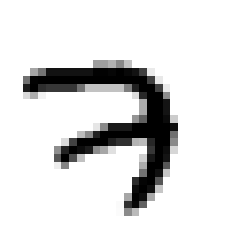

In [146]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

In [147]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

In [148]:
X_test.shape

(10000, 28, 28)

In [149]:
X_valid.shape

(5000, 28, 28)

In [150]:
X_train.shape

(55000, 28, 28)

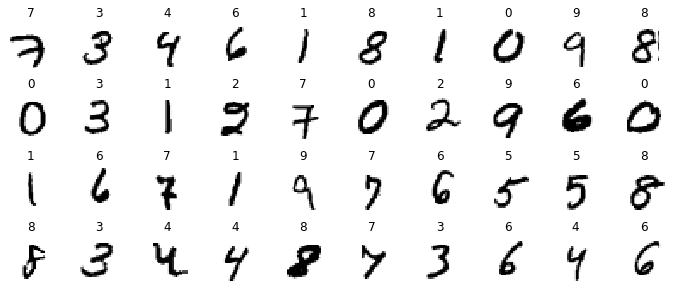

In [151]:
n_rows = 4
n_cols = 10

plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))

for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis("off")
        plt.title(y_train[index], fontsize=12)

plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [162]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.lr))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)

In [163]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [164]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [165]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=1e-3),
             metrics=["accuracy"])

expon_lr = ExponentialLearningRate(factor=1.005)

In [166]:
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[expon_lr])

1719/1719 [==============================] - 3s 2ms/step - loss: 79462722046.2221 - accuracy: 0.4872 - val_loss: 2.3911 - val_accuracy: 0.1126


Text(0, 0.5, 'Loss')

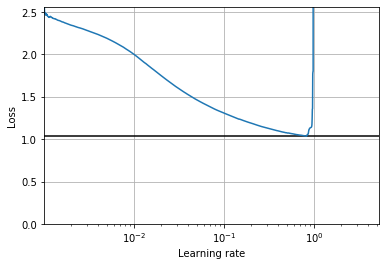

In [167]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale("log")
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

In [168]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [169]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [170]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(lr=3e-1),
             metrics=["accuracy"])

In [171]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [172]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [173]:
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

Epoch 1/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4200 - accuracy: 0.8676 - val_loss: 0.1003 - val_accuracy: 0.9714
Epoch 2/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0953 - accuracy: 0.9696 - val_loss: 0.1022 - val_accuracy: 0.9700
Epoch 3/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0686 - accuracy: 0.9771 - val_loss: 0.0728 - val_accuracy: 0.9784
Epoch 4/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0456 - accuracy: 0.9857 - val_loss: 0.0680 - val_accuracy: 0.9826
Epoch 5/100
1719/1719 [==============================] - 2s 1ms/step - loss: 0.0365 - accuracy: 0.9879 - val_loss: 0.0820 - val_accuracy: 0.9766
Epoch 6/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0283 - accuracy: 0.9912 - val_loss: 0.0780 - val_accuracy: 0.9822
Epoch 7/100
1719/1719 [==============================] - 3s 2ms/step - loss: 0.0236 - accuracy: 0.9921 - val_loss: 0.0848 - val_ac

In [174]:
model = keras.models.load_model("my_mnist_model.h5") # rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 924us/step - loss: 0.0756 - accuracy: 0.9783


[0.07561762630939484, 0.9782999753952026]

In [178]:
%reload_ext tensorboard

In [179]:
%tensorboard --logdir=./my_mnist_logs --port=6006

ERROR: Failed to start `tensorboard`: [WinError 5] アクセスが拒否されました。